In [2]:
#首先调用需要用到的包以及导入数据
import pandas as pd
import numpy as np
alldata = pd.read_csv('alldata.csv',index_col = 0)
alldata = alldata.sort_values(by=['permno','year']).drop_duplicates(subset=['permno','year'])
alldata.index = range(alldata.shape[0])

#用pivot函数将所有变量beta，size，和bm变成以股票代码为index，时间为columns的三个表格
beta_raw = alldata.pivot(index='permno', columns='year', values='beta')
size_raw = alldata.pivot(index='permno', columns='year', values='size')
bm_raw = alldata.pivot(index='permno', columns='year', values='bm')

In [3]:
##缩尾函数(与上一章相同)
# Bin Li: 可以用  from scipy.stats.mstats import winsorize
def winsorize(series,degree):
    down = series.quantile(degree)
    up = series.quantile(1-degree)
    seriesname = series.name
    x = pd.Series(np.where(series<down, down, series),name = seriesname)
    x = pd.Series(np.where(x>up, up, x),name = seriesname)
    return x

def winsorize_wholedata(data,degree=0.005):
    temp = data.apply(lambda x:winsorize(x,degree))
    return temp

In [4]:
##计算自协方差函数
def Persistence_calculator(df,degree=0.005):
    data = winsorize_wholedata(df,degree=0.005)
    corr = data.corr()
    X = pd.DataFrame([],index = range(1988,2012),columns = ['t_t+1','t_t+2','t_t+3','t_t+4','t_t+5'])
    for x in range(1988,2012):
        for y in range(5):
            if x+y < 2012:
                X.iloc[x-1988,y] = corr.loc[x,x+y+1]
    return X

autocorr_beta = Persistence_calculator(beta_raw)
autocorr_beta = autocorr_beta.applymap(lambda x:round(x, 2))
autocorr_beta

,t_t+1,t_t+2,t_t+3,t_t+4,t_t+5
1988,0.48,0.47,0.44,0.37,0.32
1989,0.50,0.42,0.37,0.33,0.35
1990,0.53,0.43,0.40,0.39,0.36
1991,0.44,0.41,0.39,0.36,0.39
1992,0.38,0.36,0.35,0.40,0.36
1993,0.39,0.32,0.37,0.38,0.37
1994,0.37,0.38,0.38,0.36,0.32
1995,0.44,0.42,0.37,0.39,0.46
1996,0.51,0.47,0.41,0.51,0.52
1997,0.53,0.44,0.46,0.51,0.52


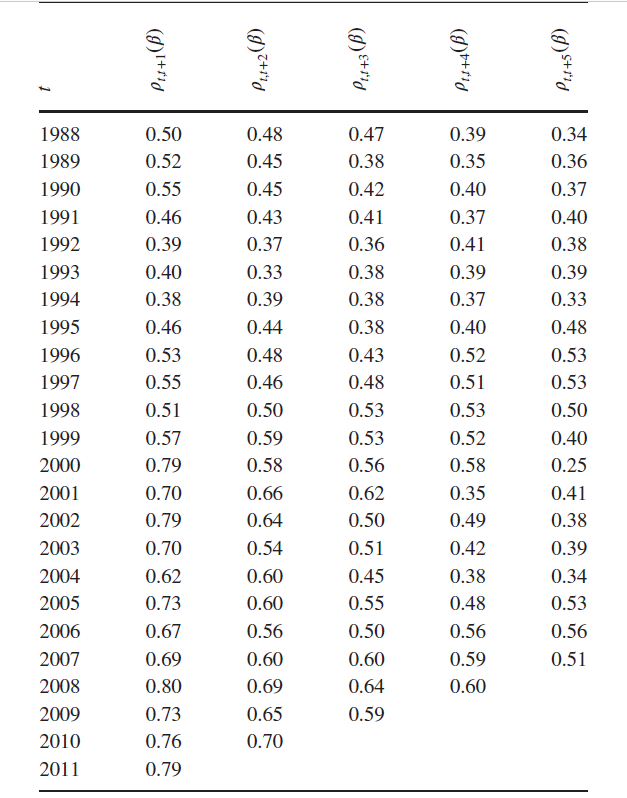

In [6]:
#beta全时段平均结果表格
autocorr_beta_avg = autocorr_beta.mean()
autocorr_beta_avg = autocorr_beta_avg.apply(lambda x:round(x, 2))
autocorr_beta_avg

t_t+1    0.59
t_t+2    0.52
t_t+3    0.47
t_t+4    0.45
t_t+5    0.41
dtype: float64

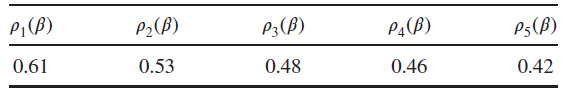

In [7]:
##所有变量全时段平均结果比较表格
autocorr_bm = Persistence_calculator(bm_raw)
autocorr_size = Persistence_calculator(size_raw)

autocorr_bm_avg = autocorr_bm.mean()
autocorr_size_avg = autocorr_size.mean()

autocorr_beta_avg.name = 'beta'
autocorr_bm_avg.name = 'bm'
autocorr_size_avg.name = 'size'

autocorr_all = pd.concat([autocorr_beta_avg,autocorr_size_avg,autocorr_bm_avg],axis=1)
autocorr_all = autocorr_all.applymap(lambda x:round(x, 2))
autocorr_all

,beta,size,bm
t_t+1,0.59,0.96,0.68
t_t+2,0.52,0.92,0.52
t_t+3,0.47,0.90,0.44
t_t+4,0.45,0.89,0.39
t_t+5,0.41,0.87,0.36


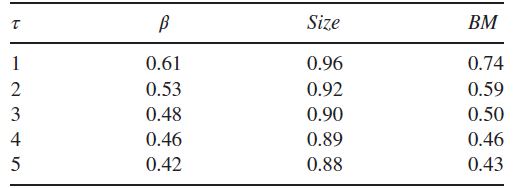